## Coding problem : classifying handwritten digits (MNIST dataset)

The objective of this task is to train a simple neural network on the mnist dataset in order to classify the handwritten digits into numbers ranging from zero to 9.
The problem is a multi class classification problem on image data.

Number of classes = 10

Task = multi class classification

### Reading the data

In [160]:
from keras.datasets import mnist
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [183]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

### Data visualisation 

In [184]:
print('X_train:' + str(train_X.shape))
print('Y_train:' + str(train_y.shape))
print('X_test:'  + str(test_X.shape))
print('Y_test:'  + str(test_y.shape))

X_train:(60000, 28, 28)
Y_train:(60000,)
X_test:(10000, 28, 28)
Y_test:(10000,)


Preparing for deployment : extracting one image to be tested later in the webservice.

In [185]:
import cv2
cv2.imwrite("sample.png",train_X[59980])

True

Data vizualisation

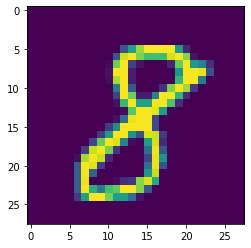

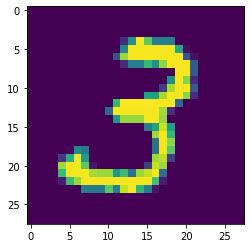

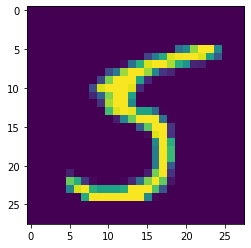

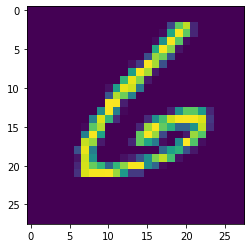

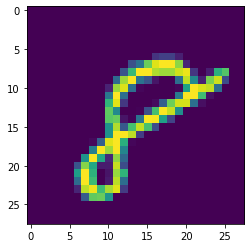

In [186]:
for i in range(59995,60000):  
    pyplot.imshow(train_X[i])
    pyplot.show()

### Preprocessing

In [187]:
image_size = train_X.shape[1]
print(image_size)
input_size = image_size * image_size
input_size

28


784

Resize the NN input fot training purposes

In [188]:
train_X = np.reshape(train_X, [-1, input_size])
test_X = np.reshape(test_X, [-1, input_size])

In order to train a neural network the data should be converted into floats in the training set.
The values of the numbers in the training set should be scaled between 0 and 255 (the data is already standarized) we divide by 255 to normalise the data and have values between 0 and 1.

In [189]:
train_X=tf.cast(train_X, tf.float32) / 255.0

In [190]:
train_y=tf.cast(train_y, tf.int32) 

One hot encoding of the classes (y), the hyperparameter depth corresponds to the number of classes

In [191]:
train_y = tf.one_hot(train_y, depth=10)

Building training set using the tensorflow api

In [192]:

train = tf.data.Dataset.from_tensor_slices((train_X, train_y))

Similarily to the previous steps we build a test set scaled and compatible with the tensorflow api.

In [193]:
test_X=tf.cast(test_X, tf.float32) / 255.0
test_y=tf.cast(test_y, tf.int32) 
test_y = tf.one_hot(test_y, depth=10)
test = tf.data.Dataset.from_tensor_slices((test_X, test_y))

In [194]:
import sys

tf.print("tensors:", train_X[0], output_stream=sys.stdout)

tensors: [0 0 0 ... 0 0 0]


In [195]:
train_X

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [196]:

val_X=train_X[55000:]
train_X=train_X[:55000]
val_y=train_y[55000:]
train_y=train_y[:55000]



Designing the Neural network (initial architecture)

In [175]:
img_classifier = keras.Sequential([
    #input_shape=(28, 28)), #number of pixels are 28x28
    #hidden layers choosing a number of layer as a power of 8 with a relu activation function. Relu is ideal for representing complex relationships between the input and the output because of its non linearity
    keras.layers.Dense(units=256, activation='relu', input_dim=input_size),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax') #number of classes 10  
])

In [ ]:
help(tf.losses)

Help on package keras.api._v2.keras.losses in keras.api._v2.keras:

NAME
    keras.api._v2.keras.losses - Built-in loss functions.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/losses/__init__.py




In [ ]:
img_classifier.compile(optimizer='adam', 
              #loss function categorical_crossentropy because we re in a multi class classification problem, other loss functions like binary crossentropy wdnt be a good fit
              loss="categorical_crossentropy",
              metrics=['accuracy'])



In [ ]:
img_classifier.build()

In [ ]:
img_classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 192)               49344     
                                                                 
 dense_14 (Dense)            (None, 128)               24704     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 276,298
Trainable params: 276,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10)
early_stopping_mc=keras.callbacks.ModelCheckpoint("minst.h5",save_best_only=False)

In [ ]:
val_X

<tf.Tensor: shape=(0, 784), dtype=float32, numpy=array([], shape=(0, 784), dtype=float32)>

In [ ]:
history = img_classifier.fit(train_X, train_y, epochs=20, batch_size=500, verbose=1,
                                    validation_data=(val_X, val_y), callbacks=[early_stopping_cb,early_stopping_mc])

Epoch 1/20
110/110 [==============================] - 4s 29ms/step - loss: 0.4472 - accuracy: 0.8783 - val_loss: 0.1408 - val_accuracy: 0.9622
Epoch 2/20
110/110 [==============================] - 2s 17ms/step - loss: 0.1519 - accuracy: 0.9553 - val_loss: 0.1055 - val_accuracy: 0.9704
Epoch 3/20
110/110 [==============================] - 2s 16ms/step - loss: 0.0998 - accuracy: 0.9702 - val_loss: 0.0978 - val_accuracy: 0.9702
Epoch 4/20
110/110 [==============================] - 2s 17ms/step - loss: 0.0754 - accuracy: 0.9766 - val_loss: 0.0819 - val_accuracy: 0.9776
Epoch 5/20
110/110 [==============================] - 2s 17ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.0708 - val_accuracy: 0.9788
Epoch 6/20
110/110 [==============================] - 2s 17ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0749 - val_accuracy: 0.9792
Epoch 7/20
110/110 [==============================] - 3s 28ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0733 - val_accuracy: 0.9788

### Base Model Evaluation

In [ ]:
loss, acc = img_classifier.evaluate(test_X, test_y, batch_size=500)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

20/20 [==============================] - 0s 6ms/step - loss: 0.0843 - accuracy: 0.9809

Test accuracy: 98.1%


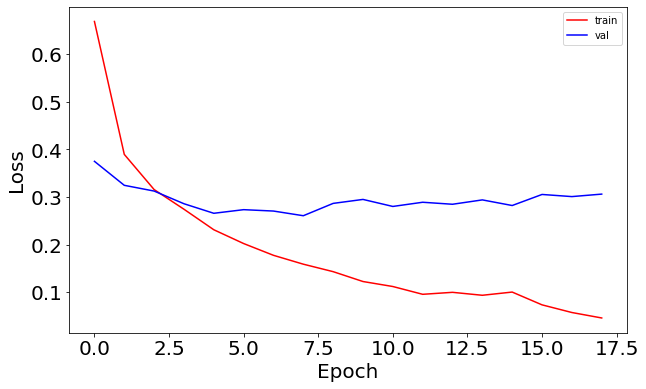

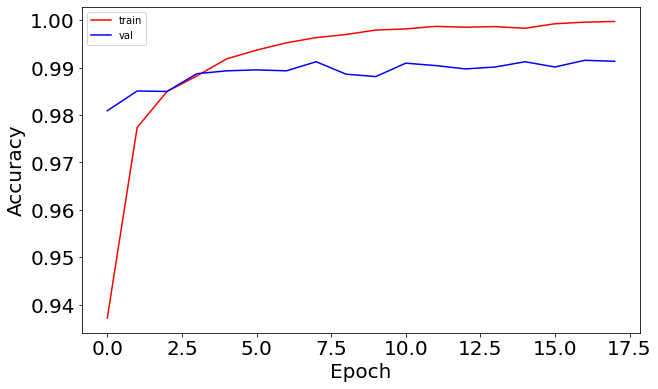

In [ ]:
# Plot the loss function
fig, ax = pyplot.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = pyplot.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)


In [ ]:
pred_y=img_classifier.predict(test_X)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_y=np.argmax(pred_y, axis=1)

test_y=np.argmax(test_y, axis=1)

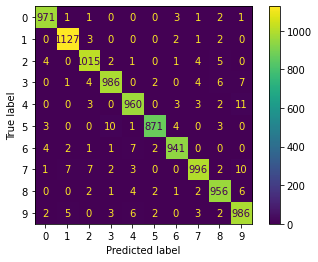

In [ ]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pyplot.show()

As we can see the base classifier is doing well. we have a Test accuracy equal to 98% and the confusion matrix shows very limited misclassification. We need though to optimise further the hyper parameters in order to improve the loss witnessed in the above figure.

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import metrics

In [ ]:
print(
    f"Classification report for classifier {img_classifier}:\n"
    f"{metrics.classification_report(test_y, pred_y)}\n"
)

Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f32d3d82340>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




### Hyper parameters tuning





In [ ]:

from tensorboard.plugins.hparams import api as hp

from tensorflow.keras import backend as k
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1,0.2, 0.3,0.4,0.45,0.5]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

In [ ]:
METRIC_acc = 'accuracy'
with tf.summary.create_file_writer('logs/mlp/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_acc, display_name='accuracy')],
  )

In [ ]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10)
early_stopping_mc=keras.callbacks.ModelCheckpoint("minst_training.h5",save_best_only=False)

Adding dropout to the architecture and configuring regulation rate!

In [ ]:
def train_test_model(run_dir,hparams,eps):
  model = tf.keras.models.Sequential([
    keras.layers.Dense(units=256, activation='relu', input_dim=input_size),
    keras.layers.Dropout(hparams[HP_DROPOUT]),
    keras.layers.Dense(units=192, activation='relu'), 
    keras.layers.Dropout(hparams[HP_DROPOUT]),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(hparams[HP_DROPOUT]),
    keras.layers.Dense(units=10, activation='softmax') #number of classes 10  
  ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )
  #model.build()
  #model.summary()
  model.fit(train_X, train_y, batch_size=500, verbose=1,
                                    validation_data=(val_X, val_y), epochs=eps, callbacks=[
        tf.keras.callbacks.TensorBoard(run_dir),  # log metrics
        hp.KerasCallback(run_dir, hparams),  # log hparams
        early_stopping_cb,
        early_stopping_mc
    ]) # Run with 1 epoch to speed things up for demo purposes
  
  acc = model.evaluate(test_X, test_y,batch_size=500,)
  return acc , model

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy , model = train_test_model(run_dir,hparams,20)
    #tf.summary.scalar("accuracy", accuracy, step=500)
    return accuracy , model

In [ ]:
session_num = 0
models=[]
for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      models.append(run('./logs/hparam_tuning_2_3/' + run_name, hparams))
      session_num += 1

--- Starting trial: run-0
{'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/20
110/110 [==============================] - 4s 29ms/step - loss: 0.5180 - accuracy: 0.8464 - val_loss: 0.1390 - val_accuracy: 0.9576
Epoch 2/20
110/110 [==============================] - 3s 26ms/step - loss: 0.1759 - accuracy: 0.9477 - val_loss: 0.0986 - val_accuracy: 0.9710
Epoch 3/20
110/110 [==============================] - 2s 22ms/step - loss: 0.1195 - accuracy: 0.9638 - val_loss: 0.0839 - val_accuracy: 0.9728
Epoch 4/20
110/110 [==============================] - 2s 23ms/step - loss: 0.0908 - accuracy: 0.9722 - val_loss: 0.0773 - val_accuracy: 0.9766
Epoch 5/20
110/110 [==============================] - 2s 21ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 6/20
110/110 [==============================] - 3s 32ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0647 - val_accuracy: 0.9810
Epoch 7/20
110/110 [==============================] - 3s 24ms/step - loss: 0.0

In [ ]:
!tensorboard --logdir logs/mlp/hparam_tuning

2023-03-15 22:46:54.457387: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 22:46:54.457501: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 22:46:54.457516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-15 22:46:56.098255: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c

In [ ]:
for m in models:
  print(m)

([0.07673513144254684, 0.9819999933242798], <keras.engine.sequential.Sequential object at 0x7f32c9c5f160>)
([0.2658335566520691, 0.9247000217437744], <keras.engine.sequential.Sequential object at 0x7f32c8d10250>)
([0.07511485368013382, 0.9815999865531921], <keras.engine.sequential.Sequential object at 0x7f32c82ee130>)
([0.27128732204437256, 0.9226999878883362], <keras.engine.sequential.Sequential object at 0x7f32d3cd7790>)
([0.06496474891901016, 0.9833999872207642], <keras.engine.sequential.Sequential object at 0x7f32e40d2700>)
([0.28695136308670044, 0.916700005531311], <keras.engine.sequential.Sequential object at 0x7f32d0146f70>)
([0.07120592892169952, 0.9807000160217285], <keras.engine.sequential.Sequential object at 0x7f32c812f2b0>)
([0.30975988507270813, 0.9107999801635742], <keras.engine.sequential.Sequential object at 0x7f32c073f9a0>)
([0.07213472574949265, 0.9807000160217285], <keras.engine.sequential.Sequential object at 0x7f32e358dbb0>)
([0.3490550220012665, 0.901199996471405

In [ ]:
models[4]

([0.06496474891901016, 0.9833999872207642],
 <keras.engine.sequential.Sequential at 0x7f32e40d2700>)

In [ ]:
best_model=models[0][1]

In [ ]:
best_model


with the previous method we identified that the best hyperparameter for the optimizer and the dropout are : for trial run-4
{'dropout': 0.3, 'optimizer': 'adam'}

we need now to find the best learning rate and the regularization

In [176]:
from keras import regularizers

In [177]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(units=256, activation='relu', input_dim=input_size,
                kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=192, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=128, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=10, activation='softmax') #number of classes 10  
  ])
model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )
model.build()
model.summary()
model.fit(train_X, train_y, batch_size=500, verbose=1,
                                    validation_data=(val_X, val_y), epochs=90, callbacks=[
        
        early_stopping_cb,
        early_stopping_mc
    ]) 
  
acc = model.evaluate(test_X, test_y,batch_size=500,)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 256)               200960    
                                                                 
 dropout_60 (Dropout)        (None, 256)               0         
                                                                 
 dense_101 (Dense)           (None, 192)               49344     
                                                                 
 dropout_61 (Dropout)        (None, 192)               0         
                                                                 
 dense_102 (Dense)           (None, 128)               24704     
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_103 (Dense)           (None, 10)              

KeyboardInterrupt: ignored

In [ ]:
acc

with regularisation the model performs poorly (under fitting). further optimisations should be done to have better parameters. the final model for now will not have regularisation.

after many trainings we find the best learning rate for this problem is the default value 0.001

#### Final model

In [197]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(units=256, activation='relu', input_dim=input_size
                ),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=192, activation='relu'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=10, activation='softmax') #number of classes 10  
  ])
model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )
model.build()
model.summary()
history=model.fit(train_X, train_y, batch_size=500, verbose=1,
                                    validation_data=(val_X, val_y), epochs=90, callbacks=[
        
        early_stopping_cb,
        early_stopping_mc
    ]) 
  
acc = model.evaluate(test_X, test_y,batch_size=500,)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 256)               200960    
                                                                 
 dropout_69 (Dropout)        (None, 256)               0         
                                                                 
 dense_113 (Dense)           (None, 192)               49344     
                                                                 
 dropout_70 (Dropout)        (None, 192)               0         
                                                                 
 dense_114 (Dense)           (None, 128)               24704     
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_115 (Dense)           (None, 10)              

In [198]:
acc

[0.0642763078212738, 0.9847999811172485]

Final accuracy : 98.5 % and 0.06 loss , close to SOA

### Model validation



> accuracy of the best model on the test set is 98,3%



> the below figure is the confusion matrix



313/313 [==============================] - 1s 3ms/step


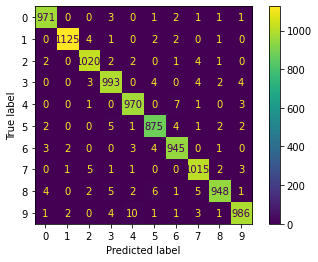

In [199]:
best_model=model
pred_y=best_model.predict(test_X)
pred_y=np.argmax(pred_y, axis=1)
test_y=np.argmax(test_y, axis=1)
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

In [200]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(test_y, pred_y)}\n"
)

Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f32d64cbf10>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




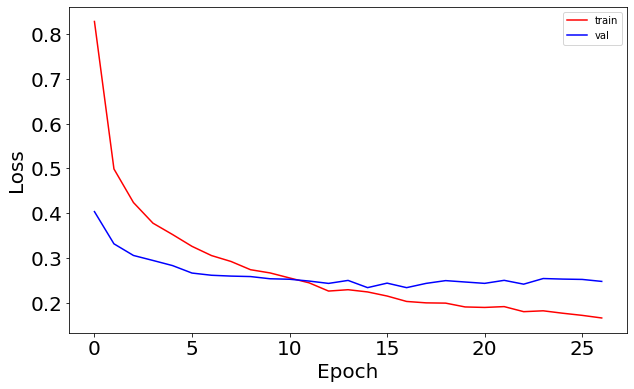

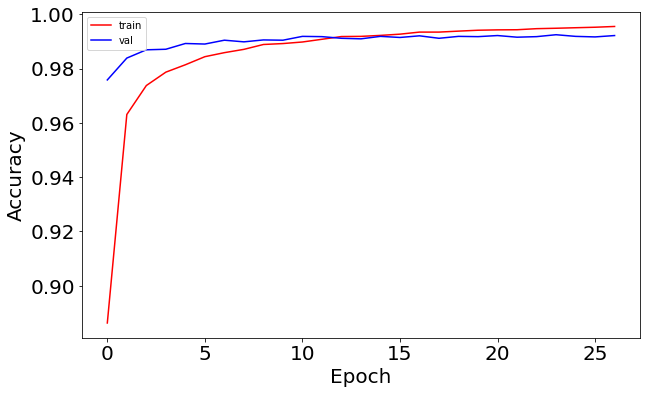

In [201]:
# Plot the loss function
fig, ax = pyplot.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = pyplot.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Prediction 

1. Read one image
2. preprocessing , scaling and normalisation
3. prediction

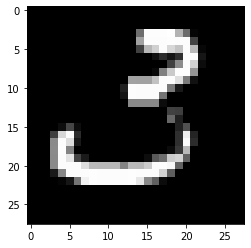

In [ ]:
import cv2
image_file_path = r"/content/sample.png"
image = cv2.imread(image_file_path, cv2.IMREAD_ANYDEPTH)
pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 110, 253, 253, 253, 255, 180, 107,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 161, 252, 252, 252, 253, 252, 252,  67,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  65, 183, 208, 252, 215, 196, 252, 185,   7,   0,   0,   0,
          0,   0],
       [  

In [ ]:
image=np.reshape(image, [-1, input_size])

In [ ]:
Im_pred = tf.cast(image, tf.float32) / 255.0

In [ ]:
Im_pred_y=best_model.predict(Im_pred)

1/1 [==============================] - 0s 23ms/step


In [ ]:
Im_pred_y=np.argmax(Im_pred_y, axis=1)

In [ ]:
Im_pred_y[0]

3

### Export Env

In [ ]:
%%python --version

Python 3.9.16


In [ ]:
%pip freeze > requirements.txt


### Save model


> Save model in binary format for serving in a web app.



In [ ]:
best_model.save("digits_classifier")

In [ ]:
loaded_model=keras.models.load_model("digits_classifier")

In [ ]:
import shutil
shutil.make_archive("updated_digits_classifier_archived", 'zip', "digits_classifier")

'/content/updated_digits_classifier_archived.zip'